### Loading libraries

In [719]:
import warnings
from IPython.display import display_html 

warnings.filterwarnings('ignore')

### Creating dataset's variables with known patterns

a = Linear space from 0-50 + random normal noise  
b = Linear space from -50 to 50 + random normal noise  
c = b<sup>2</sup>  
d = sine(a)  
e = b<sup>3</sup>  
h = categorical variable

In [727]:
import numpy as np
import pandas as pd

a = np.linspace(0, 50, num=10000) + np.random.normal(0, 1, 10000) 
b = np.linspace(-50,50,num=10000) + np.random.normal(0, 1, 10000)
c = b**2
d = np.sin(a)
e = b**3
h = ['healthy' for x in range(0,5000)]+['sick' for x in range(0,5000)]

### Creating the dataframe

In [733]:
df = pd.DataFrame({'a':a,'b':b,'c':c,'d':d,'e':e,'h':h})

### Visualizing the pairplot

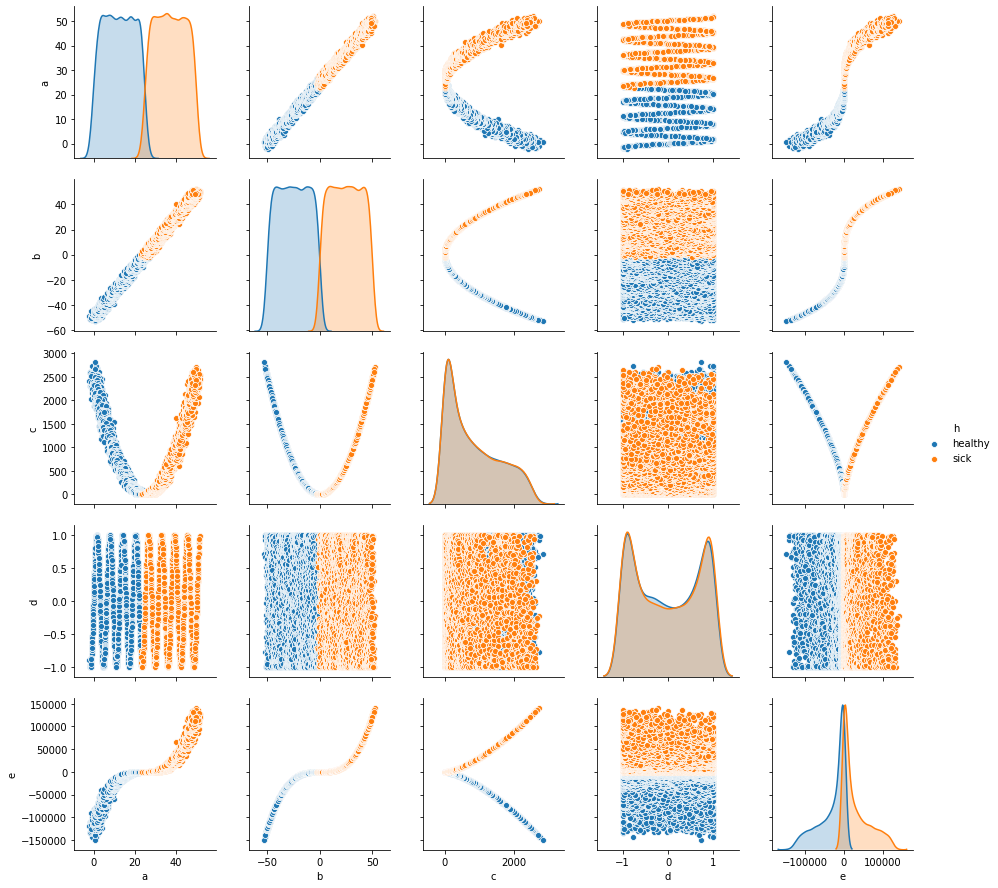

In [734]:
import seaborn as sns

sns.pairplot(df,hue="h")

Correlation Table a b c d e 
 
 a 
 1 
 0.997032 
 0.00128554 
 0.0602909 
 0.911961 
 
 
 b 
 0.997032 
 1 
 0.00139332 
 0.058903 
 0.915636 
 
 
 c 
 0.00128554 
 0.00139332 
 1 
 0.00173893 
 0.00197491 
 
 
 d 
 0.0602909 
 0.058903 
 0.00173893 
 1 
 0.0870732 
 
 
 e 
 0.911961 
 0.915636 
 0.00197491 
 0.0870732 
 1 
 
 PPS Table a b c d e h 
 
 a 
 1 
 0.901123 
 0 
 0 
 0.901038 
 0.496591 
 
 
 b 
 0.902854 
 1 
 8.92309e-05 
 0 
 0.999434 
 0.498022 
 
 
 c 
 0.808253 
 0.998819 
 1 
 0 
 0.998819 
 0 
 
 
 d 
 0.992908 
 0 
 0 
 1 
 0 
 0 
 
 
 e 
 0.810602 
 0.998757 
 0 
 0 
 1 
 0.0487209 
 
 
 h 
 0.973427 
 0.985645 
 0.239676 
 0.226431 
 0.985645 
 1

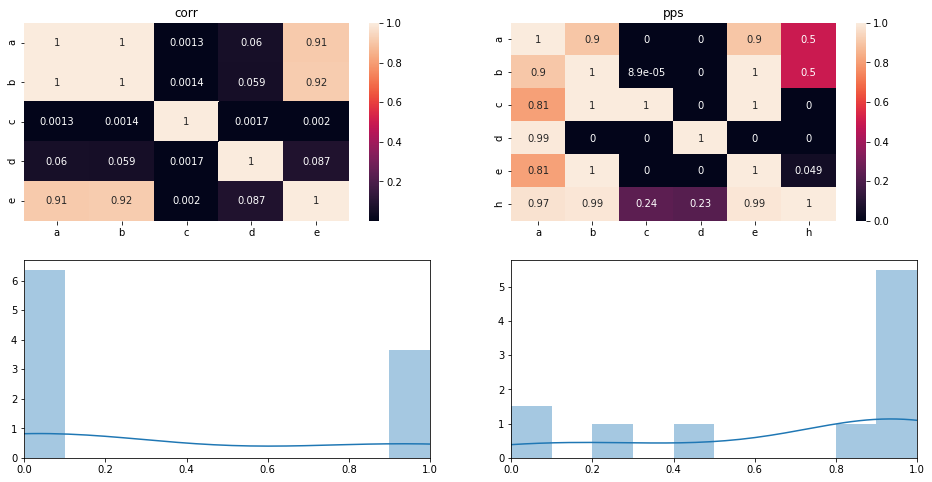

In [735]:
import ppscore as pps
import matplotlib.pyplot as plt


df1_styler = df.corr().abs().style.set_table_attributes("style='display:inline'").set_caption('Correlation Table')
df2_styler = pps.matrix(df).style.set_table_attributes("style='display:inline'").set_caption('PPS Table')

fig, ax =plt.subplots(nrows=2, ncols=2,figsize=(16,8))

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

sns.heatmap(df.corr().abs(),annot=True, ax = ax[0,0]).set_title("corr")
sns.heatmap(pps.matrix(df),annot=True, ax=ax[0,1]).set_title("pps")
sns.distplot(df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates(), bins=10, ax=ax[1,0]).set(xlim=(0, 1))
sns.distplot(pps.matrix(df).abs().unstack().sort_values(ascending=False).drop_duplicates(), bins=10, ax=ax[1,1]).set(xlim=(0,1))
fig.show()

In [737]:
print("Mean predictive power score value: {}".format(pps.matrix(df).abs().unstack().sort_values(ascending=False).drop_duplicates().mean()))
print("Mean correlation value: {}".format(df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().mean()))

Mean predictive power score value: 0.6890605825915299
Mean correlation value: 0.3670262875831986


In [732]:
pps.matrix(df).abs().unstack().sort_values(ascending=False).drop_duplicates().iloc[1:].to_frame().reset_index().head(10)

,level_0,level_1,0
0,e,b,0.999434
1,e,c,0.998819
2,b,c,0.998819
3,b,e,0.998757
4,a,d,0.992908
5,b,h,0.985645
6,a,h,0.973427
7,a,b,0.902854
8,b,a,0.901123
9,e,a,0.901038


In [709]:
df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().iloc[1:].to_frame().reset_index().head(10)

,level_0,level_1,0
0,a,b,0.996972
1,b,e,0.915491
2,e,a,0.912261
3,e,d,0.084770
4,a,d,0.056197
5,d,b,0.055574
6,d,c,0.020126
7,f,c,0.009458
8,c,e,0.003610
9,f,e,0.003268


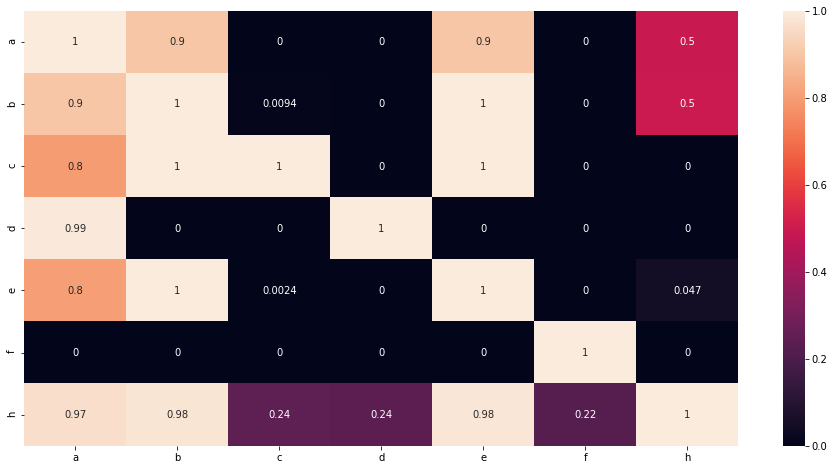

In [714]:
plt.figure(figsize=(16,8))
sns.heatmap(pps.matrix(df),annot=True)